In [1]:
# load necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve, auc, confusion_matrix, classification_report
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

## Read and Clean the data

In [3]:
df = pd.read_csv("creditcard.csv")
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [9]:
# explore the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [10]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,1.772925e-15,9.289524e-16,-1.803266e-15,1.674888e-15,1.475621e-15,3.501098e-15,1.392460e-15,-7.466538e-16,4.258754e-16,9.019919e-16,5.126845e-16,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [14]:
#check for missing values
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

## Visualization

In [5]:
# find the percentage of each class label
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

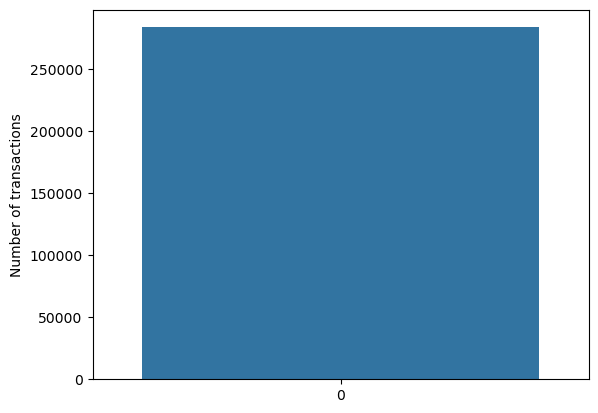

In [27]:
# visualize the class labels
sns.countplot(df['Class'])
plt.ylabel("Number of transactions");

C:\Users\olaju\AppData\Local\Temp\ipykernel_2664\2139699928.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Time'])


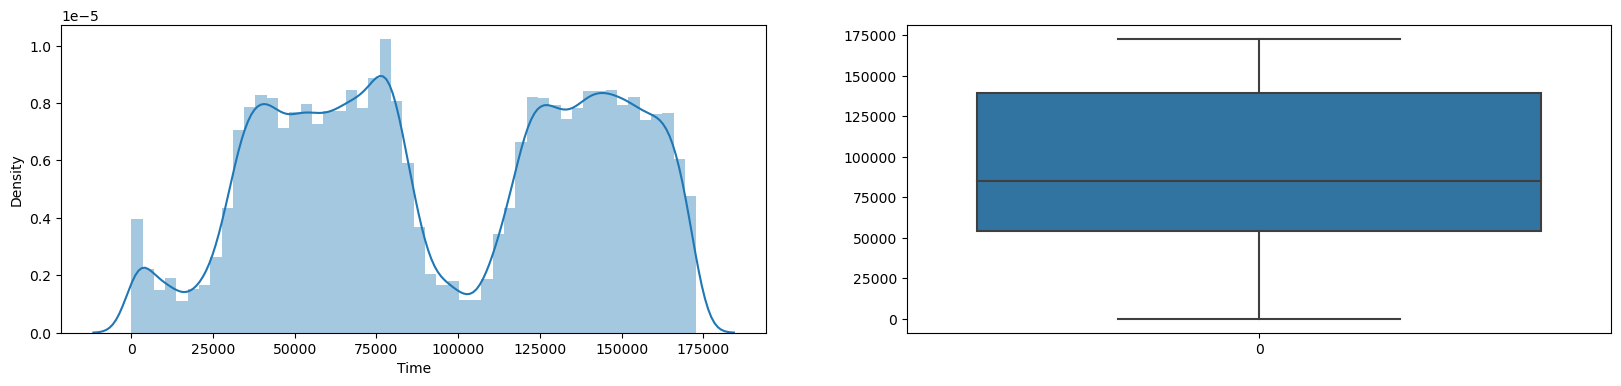

In [6]:
#Univariate analysis of time
f = plt.figure(figsize=(20,4))
f.add_subplot(1,2,1)
sns.distplot(df['Time'])
f.add_subplot(1,2,2)
sns.boxplot(df['Time']);


C:\Users\olaju\AppData\Local\anaconda3\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


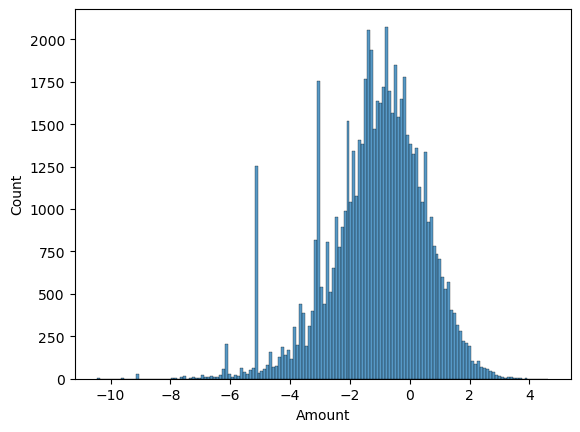

In [25]:
sns.histplot(np.log(df['Amount']));

<Axes: >

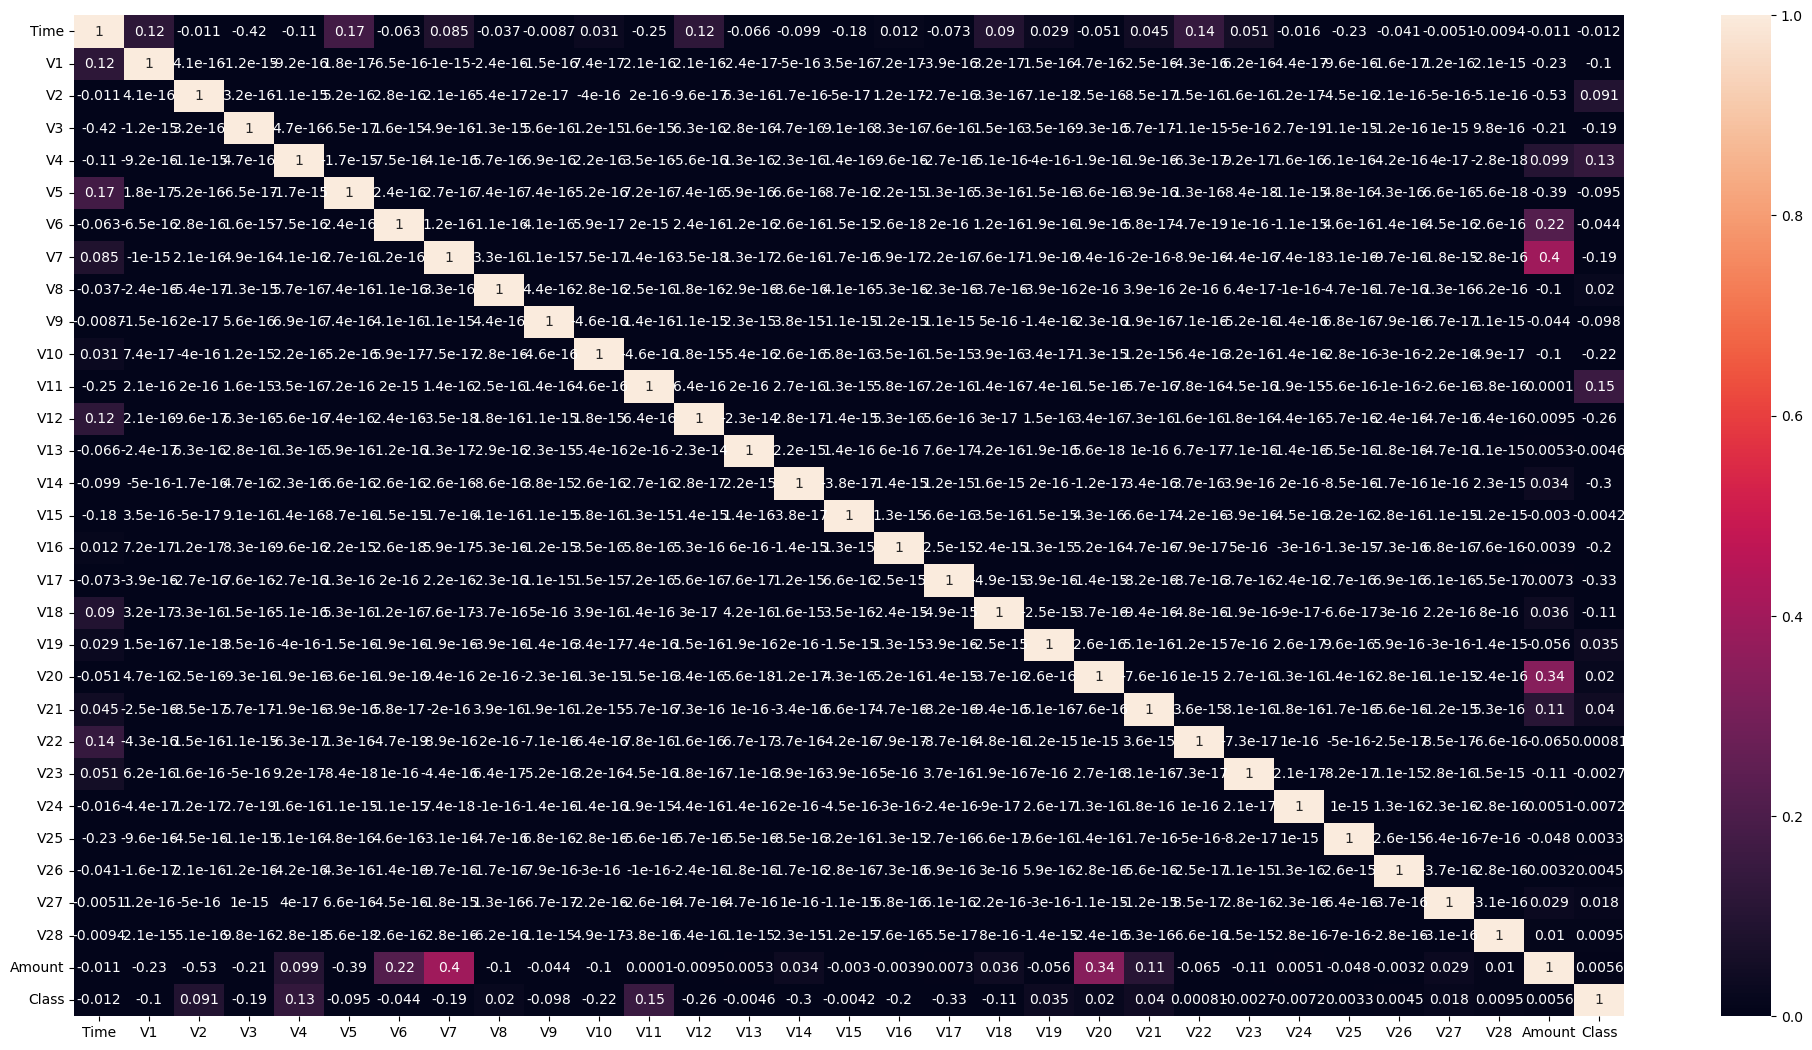

In [7]:
plt.figure(figsize=(25,13))
sns.heatmap(df.corr(), annot = True, vmin=0, vmax=1)

## Preprocess the dataset

In [8]:
# check for duplicated data and delete them from the dataset
print(f'Duplicated rows are: {df.duplicated().sum()}')
df.drop_duplicates(inplace = True)
print(f'Unique rows are: {len(df)}')

Duplicated rows are: 1081
Unique rows are: 283726


In [9]:
#standardize the amount attribute
sc = StandardScaler()
df['Amount'] = sc.fit_transform(df['Amount'].values.reshape(-1,1))

## Split the dataset

In [10]:
#split the dataset
X = df.drop(['Class', 'Time'], axis = 1)
y = df['Class']

In [11]:
#train set ~ 70% of data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state= 42)
print(f'X_train: {X_train.shape}, y_train: {y_train.shape}, X_test: {X_test.shape}, y_test:{y_test.shape}')

X_train: (198608, 29), y_train: (198608,), X_test: (85118, 29), y_test:(85118,)


In [13]:
#val set ~ 6% of data and test ~24% of data
X_val,X_test,y_val,y_test = train_test_split(X_test,y_test, test_size = 0.8, random_state = 42)
print(f'X_val: {X_val.shape}, y_val: {y_val.shape}, X_test: {X_test.shape}, y_test:{y_test.shape}')

X_val: (13619, 29), y_val: (13619,), X_test: (54476, 29), y_test:(54476,)


In [14]:
# check number of non-fradulent and fraudulent cases in each split

print(y_train.value_counts(0))
print(y_val.value_counts(0))
print(y_test.value_counts(0))

0    198269
1       339
Name: Class, dtype: int64
0    13598
1       21
Name: Class, dtype: int64
0    54389
1       87
Name: Class, dtype: int64


## Train the standard models  

In [15]:
# import necessary libraries from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import confusion_matrix,precision_recall_curve,f1_score,auc,roc_auc_score,roc_curve,recall_score,classification_report

In [16]:
# function to train the baseline models

def make_prediction(classifier, X_train=X_train, X_test=X_test,X_val=X_val,y_train =y_train, y_test=y_test,y_val=y_val):
    
    model = classifier.fit(X_train,y_train)
    
    pred_t = model.predict(X_train)
    fpr, tpr, thresholds = roc_curve(y_train, pred_t)
    roc_auc = auc(fpr,tpr)
    f1 = f1_score(y_train, pred_t)
    print(f'Roc_auc and F1_Score for the training set: {roc_auc}, f1: {f1}\n')

    # predict on validationset and evaluate the model
    pred_val = model.predict(X_val)
    fpr, tpr, thresholds = roc_curve(y_val,pred_val)
    roc_auc = auc(fpr,tpr)
    f1 = f1_score(y_val, pred_val)
    print(f'Roc_auc and F1_Scorefor validation set: {roc_auc}, f1: {f1}\n')


    # predict on testset and evaluate the model
    y_pred = model.predict(X_test)
    cnf_matrix = confusion_matrix(y_test,y_pred)
    fpr, tpr, thresholds = roc_curve(y_test,y_pred)
    roc_auc = auc(fpr,tpr)
    f1 = f1_score(y_test,y_pred)
    print(f'Roc_auc and F1_Score for test set: {roc_auc}, f1: {f1}\n')
    print(f'Confusion matrix for test set: {cnf_matrix} \n')

    #print the classification report
    report = classification_report(y_test,y_pred)
    print(report)
    #put the report in dataframe
    #result = pd.DataFrame([["DecisionTree",  f1, roc_auc]], columns=["Model","F1", "ROC_AUC"])

    #result



In [17]:
make_prediction(DecisionTreeClassifier(random_state=42))


Roc_auc and F1_Score for the training set: 1.0, f1: 1.0

Roc_auc and F1_Scorefor validation set: 0.8568854663500934, f1: 0.6976744186046512

Roc_auc and F1_Score for test set: 0.9193012109657906, f1: 0.7849462365591398

Confusion matrix for test set: [[54363    26]
 [   14    73]] 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     54389
           1       0.74      0.84      0.78        87

    accuracy                           1.00     54476
   macro avg       0.87      0.92      0.89     54476
weighted avg       1.00      1.00      1.00     54476



In [18]:
make_prediction(BernoulliNB())

Roc_auc and F1_Score for the training set: 0.8199379493825847, f1: 0.718543046357616

Roc_auc and F1_Scorefor validation set: 0.7856407454877817, f1: 0.6857142857142857

Roc_auc and F1_Score for test set: 0.8447172697826196, f1: 0.7547169811320755

Confusion matrix for test set: [[54377    12]
 [   27    60]] 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     54389
           1       0.83      0.69      0.75        87

    accuracy                           1.00     54476
   macro avg       0.92      0.84      0.88     54476
weighted avg       1.00      1.00      1.00     54476



In [19]:
make_prediction(KNeighborsClassifier())

Roc_auc and F1_Score for the training set: 0.8981897392730542, f1: 0.864

Roc_auc and F1_Scorefor validation set: 0.8094502692973057, f1: 0.7222222222222222

Roc_auc and F1_Score for test set: 0.8964965659257926, f1: 0.851851851851852

Confusion matrix for test set: [[54383     6]
 [   18    69]] 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     54389
           1       0.92      0.79      0.85        87

    accuracy                           1.00     54476
   macro avg       0.96      0.90      0.93     54476
weighted avg       1.00      1.00      1.00     54476



In [43]:
make_prediction(SVC(random_state=42))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Roc_auc and F1_Score for the training set: 0.9114892938203156, f1: 0.8942307692307692

Roc_auc and F1_Scorefor validation set: 0.7115384615384616, f1: 0.5945945945945945

Roc_auc and F1_Score for test set: 0.8425558208568197, f1: 0.7914438502673797

Confusion matrix for test set: [[67982     5]
 [   34    74]] 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     67987
           1       0.94      0.69      0.79       108

    accuracy                           1.00     68095
   macro avg       0.97      0.84      0.90     68095
weighted avg       1.00      1.00      1.00     68095



## Do hyperparameter tuning to get the best hyperparameter

In [20]:
# hyperparameter tuning for DecisionTree
param = {"max_leaf_nodes": [2,5,10], "max_depth": [6,12,20],"min_samples_split": [20,50,100], "splitter":['random','best']}

DT= GridSearchCV(DecisionTreeClassifier(random_state = 42), param, refit = True)
DT.fit(X_train,y_train)



GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [6, 12, 20], 'max_leaf_nodes': [2, 5, 10],
                         'min_samples_split': [20, 50, 100],
                         'splitter': ['random', 'best']})

In [21]:
#print best parameters
print(DT.best_params_)

#print best estimators
print(DT.best_estimator_)

{'max_depth': 6, 'max_leaf_nodes': 10, 'min_samples_split': 20, 'splitter': 'best'}
DecisionTreeClassifier(max_depth=6, max_leaf_nodes=10, min_samples_split=20,
                       random_state=42)


In [22]:
# Use the best parameter for prediction
pr_dt = DT.predict(X_train)
fpr, tpr, thresholds = roc_curve(y_train, pr_dt)
roc_auc = auc(fpr,tpr)
f1 = f1_score(y_train, pr_dt)
print(f'Roc_auc and F1_Score for the training set: {roc_auc}, f1: {f1}\n')

# predict on validationset and evaluate the model
pred_dt_val = DT.predict(X_val)

cnf_matrix = confusion_matrix(y_val,pred_dt_val)
print(f'Confusion matrix for validation set: {cnf_matrix} \n')
fpr, tpr, thresholds = roc_curve(y_val,pred_dt_val)
roc_auc = auc(fpr,tpr)
f1 = f1_score(y_val, pred_dt_val)
print(f'Roc_auc and F1_Scorefor validation set: {roc_auc}, f1: {f1}\n')

      
# predict on testset and evaluate the model
y_pred_dt = DT.predict(X_test)
      
cnf_matrix = confusion_matrix(y_test,y_pred_dt)
fpr, tpr, thresholds = roc_curve(y_test,y_pred_dt)
roc_auc = auc(fpr,tpr)
f1 = f1_score(y_test,y_pred_dt)
print(f'Roc_auc and F1_Score for test set: {roc_auc}, f1: {f1}\n')
print(f'Confusion matrix for test set: {cnf_matrix} \n')

#print the classification report
report = classification_report(y_test,y_pred_dt)
print(report)
#put the report in dataframe
result = pd.DataFrame([["DecisionTree",  f1, roc_auc]], columns=["Model","F1", "ROC_AUC"])

result

Roc_auc and F1_Score for the training set: 0.8981746083146089, f1: 0.855784469096672

Confusion matrix for validation set: [[13597     1]
 [    8    13]] 

Roc_auc and F1_Scorefor validation set: 0.8094870394105576, f1: 0.742857142857143

Roc_auc and F1_Score for test set: 0.8792368005447349, f1: 0.8198757763975155

Confusion matrix for test set: [[54381     8]
 [   21    66]] 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     54389
           1       0.89      0.76      0.82        87

    accuracy                           1.00     54476
   macro avg       0.95      0.88      0.91     54476
weighted avg       1.00      1.00      1.00     54476



,Model,F1,ROC_AUC
0,DecisionTree,0.819876,0.879237


In [44]:
# hyperparameter tuning for NaiveBayes
param_grid ={"alpha":[0.01,0.1,0.5,1.0],
            "binarize":[0.0,0.1], 'fit_prior': [True,False]}#, 'Class_prior':True}

NB_grid= GridSearchCV(BernoulliNB(), param_grid, refit = True)
NB_grid.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None,
                                   fit_prior=True),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.01, 0.1, 0.5, 1.0], 'binarize': [0.0, 0.1],
                         'fit_prior': [True, False]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [24]:
NB_grid.best_params_

NameError: name 'NB_grid' is not defined

In [ ]:
#predict on the train dataset
pr = NB_grid.predict(X_train)
fpr, tpr, thresholds = roc_curve(y_train, pr)
roc_auc = auc(fpr,tpr)
f1 = f1_score(y_train, pr)
print(f'Roc_auc and F1_Score for the training set: {roc_auc}, f1: {f1}\n')

# predict on validationset
pred_val = NB_grid.predict(X_val)
fpr, tpr, thresholds = roc_curve(y_val,pred_val)
roc_auc = auc(fpr,tpr)
f1 = f1_score(y_val, pred_val)
print(f'Roc_auc and F1_Scorefor validation set: {roc_auc}, f1: {f1}\n')


# predict on testset and evaluate the model
y_pred_dt = NB_grid.predict(X_test)
      
cnf_matrix = confusion_matrix(y_test,y_pred_dt)
fpr, tpr, thresholds = roc_curve(y_test,y_pred_dt)
roc_auc = auc(fpr,tpr)
f1 = f1_score(y_test,y_pred_dt)
print(f'Roc_auc and F1_Score for test set: {roc_auc}, f1: {f1}\n')
print(f'Confusion matrix for test set: {cnf_matrix} \n')

#print the classification report
report = classification_report(y_test,y_pred_dt)
print(report)

result = pd.DataFrame([["BernoulliNB",  f1, roc_auc]], columns=["Model","F1", "ROC_AUC"])

result

In [ ]:
# hyperparameter tuning for SVC
param_grid = {'C':[0.1,1,10,100,1000],
             'gamma':[1,0.1,0.01,0.001,0.0001],
             'kernel':['rbf','linear','poly','sigmoid']}

grid = RandomizedSearchCV(SVC(random_state = 42), param_grid, refit = True,  n_iter=5)#verbose = 2, n_jobs = -1,cv=3,
#grid = GridSearchCV(SVC(random_state=42), param_grid, refit = True, verbose = 3)
grid.fit(X_train,y_train)

In [ ]:
print(grid.get_params().keys(),'\n')
#print best parameters
print(grid.best_params_, '\n')

#print best estimators
print(grid.best_estimator_,'\n')

In [ ]:
pr = grid.predict(X_train)
fpr, tpr, thresholds = roc_curve(y_train, pr)
roc_auc = auc(fpr,tpr)
f1 = f1_score(y_train, pr)
print(f'Roc_auc and F1_Score for the training set: {roc_auc}, f1: {f1}\n')

# predict on validationset
pred_grid = grid.predict(X_val)

cnf_matrix = confusion_matrix(y_val,pred_grid)
print(f'Confusion matrix for validation set: {cnf_matrix} \n')

# get the metrics
fpr, tpr, thresholds = roc_curve(y_val,pred_grid)
roc_auc = auc(fpr,tpr)
f1 = f1_score(y_val, pred_grid)
print(f'Roc_auc and F1_Scorefor validation set: {roc_auc}, f1: {f1}\n')

      
# predict on testset
y_pred = grid.predict(X_test)
      
cnf_matrix = confusion_matrix(y_test,y_pred)
fpr, tpr, thresholds = roc_curve(y_test,y_pred)
roc_auc = auc(fpr,tpr)
f1 = f1_score(y_test,y_pred)
print(f'Roc_auc and F1_Score for test set: {roc_auc}, f1: {f1}\n')
print(f'Confusion matrix for test set: {cnf_matrix} \n')
      
report = classification_report(y_test,y_pred)
print(report)
#getting the result
result = pd.DataFrame([["SVM",  f1, roc_auc]], columns=["Model","F1", "ROC_AUC"])

result

In [ ]:
# hyperparameter tuning for KNN algorithm
param_grids = {"n_neighbors":[1,5,10,20,30,40,50],
              "weights": ['uniform', 'distance']}

kn_grid = GridSearchCV(KNeighborsClassifier(), param_grids, cv= 3, verbose=2, n_jobs=-1)
kn_grid.fit(X_train,y_train)

In [ ]:
# get the best parameter
kn_grid.best_params_

In [ ]:
# predict using the best parameter
kn_pred_k = kn_grid.predict(X_train)
fpr, tpr, thresholds = roc_curve(y_train, kn_pred_k)
roc_auc = auc(fpr,tpr)
f1 = f1_score(y_train, kn_pred_k )
print(f'Roc_auc and F1_Score for the training set: {roc_auc}, f1: {f1}\n')

# predict on validationset
pred_val_k = kn_grid.predict(X_val)
# get the metrics
fpr, tpr, thresholds = roc_curve(y_val,pred_val_k)
roc_auc = auc(fpr,tpr)
f1 = f1_score(y_val, pred_val_k)
print(f'Roc_auc and F1_Scorefor validation set: {roc_auc}, f1: {f1}\n')


# predict on testset
y_pred = kn_grid.predict(X_test)    
cnf_matrix = confusion_matrix(y_test,y_pred)
fpr, tpr, thresholds = roc_curve(y_test,y_pred)
roc_auc = auc(fpr,tpr)
f1 = f1_score(y_test,y_pred)
print(f'Roc_auc and F1_Score for test set: {roc_auc}, f1: {f1}\n')
print(f'Confusion matrix for test set: {cnf_matrix} \n')
      
report = classification_report(y_test,y_pred)
print(report)
#getting the result
result = pd.DataFrame([["kNearestNeighbor",  f1, roc_auc]], columns=["Model","F1", "ROC_AUC"])

result